![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez

# Practical Lab 5 - Multivariate Regression, Non-Parametric Models and Cross-Validation

# 1. Framing the Problem - Describe the goal of this report


The goal is to explore Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression. 

![Image](https://www.makatimed.net.ph/wp-content/uploads/2020/11/1000-8.png)

# 2. Importing libraries, loading datasetand exploratory data analysis (EDA)

## 2.1. Importing all the essential libraries and sub modules

In [14]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import datasets




## 2.2. Loading the diabetes dataset from Scikit-Learn 

Scikit-Learn provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)). Here we will use the diabetes dataset ([description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)). 

In [15]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [16]:
# Loading the diabetes dataset to a variable
diabetes = datasets.load_diabetes()

# Converting the dataset into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Adding the target variable to the DataFrame. The target column (11) is a quantitative measure of disease progression one year after baseline.
df['target'] = diabetes.target

# Displaying the first few rows of the DataFrame
print(df.head())
df

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## 2.3.   Exploratory data analysis EDA - Describing the data, explore it, and provide insights about it. 

This should include at least: statistics, histograms, and a correlation matrix

### 2.3.1. Explore statistics (e.g. using Pandas `describe` function)

In [17]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We have 442 observations for all variables, showing a complete dataset in all columns. 

The mean of the BMI is -2.245564e-16, as the mean is adjusted to be around 0 we can interpret that this value is expected in standardized data. In the BMI column, the third quartile (Q3) is  0.03124802, this means that 75% of the BMI values are below this standardized score.

In the sex column, the minimum value is -4.464164e-02,  the same as the first (Q1) and second quartile (Q2) values and the maximum value is 0.05068012 the same as the third quartile (Q3) value, indicating a binary variable.

### 2.3.2. Plotting histograms for each column in the dataframe side by side

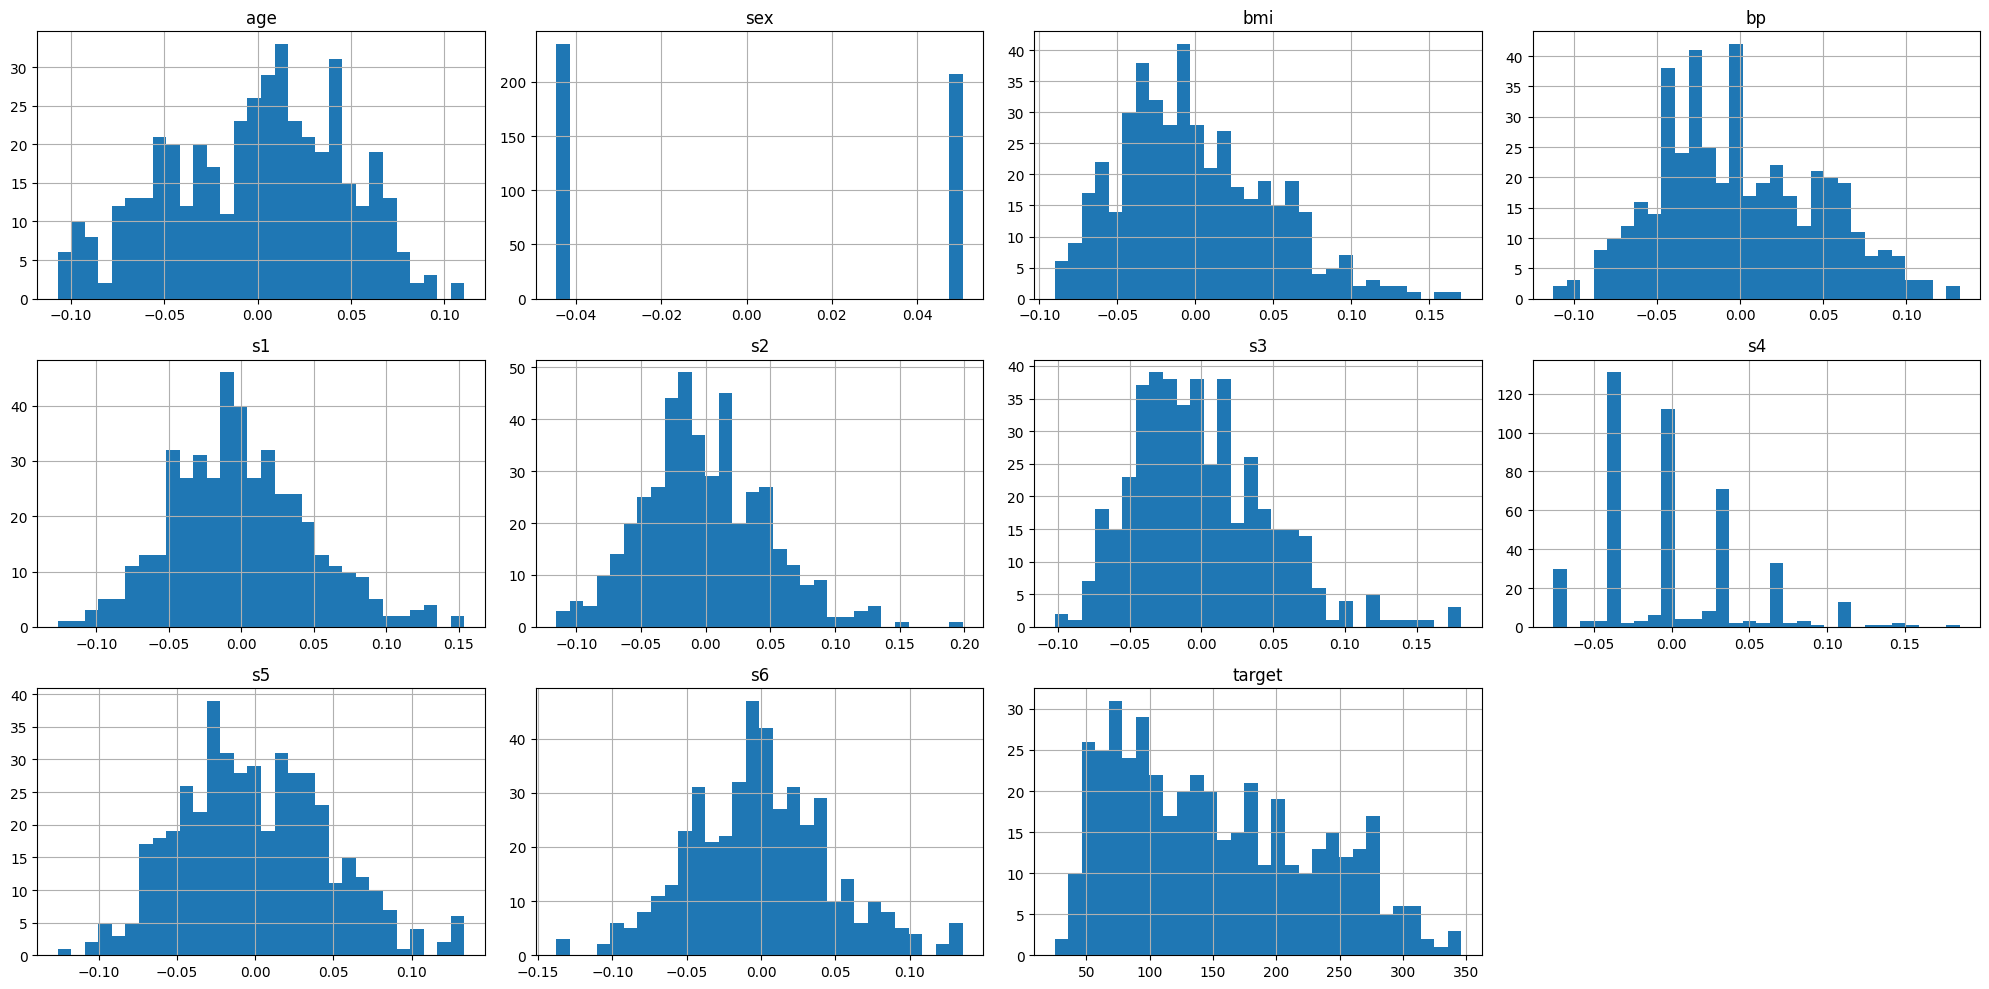

In [18]:
columns = df.columns  # Using all columns in the DataFrame

plt.figure(figsize=(20, 10))  # Adjusting the figure size as needed

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)  # Adjusting the grid size based on the number of columns
    df[column].hist(bins=30)  # Adjusting the number of bins as needed
    plt.title(column)

plt.tight_layout()
plt.show()



The x-axes are going from approximately - 0.15 to 0.15, these values are possibly standardized scores, which are the result of a normalization. sThis shows that the histogram distributes the participants over different normalized values. Only the Target graph is not normalized.

BMI, s2, and s3 histograms look normal but have a slightly positive skew indicating a few individuals have higher BMI, s2 (ldl, low-density lipoproteins), and s3 (hdl, high-density lipoproteins) values than the rest of the population.

The distribution of sex shows two bars that indicates a binary variable. The several peaks in S4, indicates that there are subgroups in the population.

### 2.3.3. Creating the Correlation Matrix using Pandas --> df.corr()

In [19]:

corr_matrix = df.corr()
print(corr_matrix)

             age       sex       bmi        bp        s1        s2        s3   
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181  \
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

#### 2.3.3.1 Correlation Matrix using Seaborn

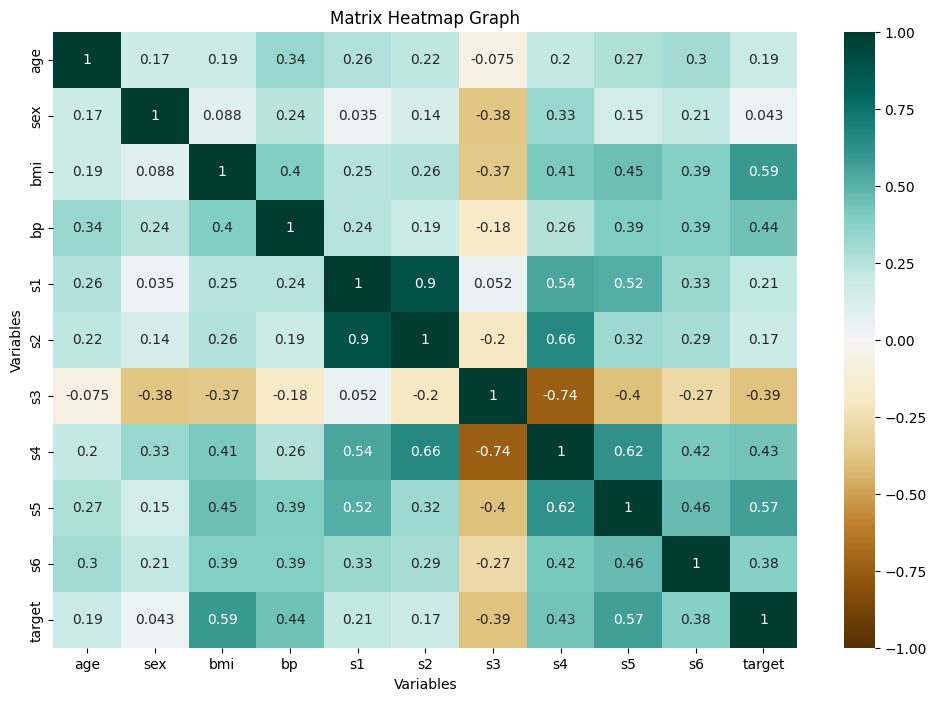

In [20]:
plt.figure(figsize=(12, 8)) 

# Plotting the heatmap
heatmap = sn.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10)


plt.title('Matrix Heatmap Graph')
plt.xlabel('Variables') 
plt.ylabel('Variables')

# Display the plot
plt.show()

The correlation matrix heatmap graph assists in identifying relationships between variables. 

The diagonal line of 1s represents the correlation of each variable with itself, which is always perfect showing a value of 1.

Analyzing the intersection of s2 and s4, we see a correlation of 0.66 that suggests a moderate positive correlation this means that when s2 increases, s4 tends to also increase.

On the other hand,  the intersection of s3 indicates a negative correlation with all other variables. This indicates that as s3 increases, all other variables tend to decrease, and vice versa.

![image](https://cdn.aarp.net/content/aarpe/en/home/health/conditions-treatments/info-2021/diabetes-risk-factors/_jcr_content/root/container_main/container_body_main/container_body1/container_body_cf/container_image/articlecontentfragment/cfimage.coreimg.50.932.jpeg/content/dam/aarp/health/conditions_treatments/2021/01/1140-diabetes-risk.jpg)

# 4. Set a test-set aside

In [21]:
from sklearn.model_selection import train_test_split

# First split: 70% training, 30% temp_test
X_train, X_temp_test, Y_train, Y_temp_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)
# Second split of temp_test into validation and test: each becomes 15% of the total
X_val, X_test, Y_val, Y_test = train_test_split(X_temp_test, Y_temp_test, test_size=0.5)

# Printing shapes to verify the splits
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((309, 10), (66, 10), (67, 10), (309,), (66,), (67,))

# 5. Perform cross-validation. consider using the cross_validate function as it provides a list of scoring functions as an input. 
This should be on:
- At least two polynomial models (degrees >=0, of your choice)
- At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)
- At least two kNNs

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as np

# Define MAPE scorer
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Models to evaluate
models = {
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Polynomial Regression (Degree 3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Decision Tree (Max Depth 3)': DecisionTreeRegressor(max_depth=3),
    'Decision Tree (Max Depth 5)': DecisionTreeRegressor(max_depth=5),
    'kNN (n_neighbors=3)': KNeighborsRegressor(n_neighbors=3),
    'kNN (n_neighbors=5)': KNeighborsRegressor(n_neighbors=5)
}

# Scoring metrics
scoring = {'R2': 'r2', 'MAE': 'neg_mean_absolute_error', 'MAPE': mape_scorer}

# Perform cross-validation and store results
cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring, return_train_score=False)
    cv_results[name] = {
        'R-Squared (Mean)': scores['test_R2'].mean(),
        'R-Squared (Std)': scores['test_R2'].std(),
        'MAE (Mean)': scores['test_MAE'].mean(),  
        'MAE (Std)': scores['test_MAE'].std(),
        'MAPE (Mean)': scores['test_MAPE'].mean(),  
        'MAPE (Std)': scores['test_MAPE'].std()
    }

cv_results



{'Polynomial Regression (Degree 2)': {'R-Squared (Mean)': -0.10277238507791646,
  'R-Squared (Std)': 0.4122605298666655,
  'MAE (Mean)': -56.371093860055325,
  'MAE (Std)': 6.7984182391759855,
  'MAPE (Mean)': -49.66683760015668,
  'MAPE (Std)': 3.7471748954510744},
 'Polynomial Regression (Degree 3)': {'R-Squared (Mean)': -457.81659288938755,
  'R-Squared (Std)': 402.9248274471011,
  'MAE (Mean)': -824.5300620654647,
  'MAE (Std)': 299.9869794345708,
  'MAPE (Mean)': -644.5888020493528,
  'MAPE (Std)': 243.50436316458385},
 'Decision Tree (Max Depth 3)': {'R-Squared (Mean)': 0.3475152669645635,
  'R-Squared (Std)': 0.08546817908385768,
  'MAE (Mean)': -50.56423149655958,
  'MAE (Std)': 3.133678895644967,
  'MAPE (Mean)': -44.420090230678184,
  'MAPE (Std)': 6.479494243524811},
 'Decision Tree (Max Depth 5)': {'R-Squared (Mean)': 0.1650118472030098,
  'R-Squared (Std)': 0.2006437234801045,
  'MAE (Mean)': -54.463346390318485,
  'MAE (Std)': 6.476510480837299,
  'MAPE (Mean)': -46.44495

# 6. Construct a table summarizing the cross-validation results. 
Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds):
- R-Squared
- Mean Absolute Error (MAE)
 - MAPE 

In [23]:
# Convert summary table to DataFrame 
import pandas as pd

summary_df = pd.DataFrame(cv_results)
summary_df

,Polynomial Regression (Degree 2),Polynomial Regression (Degree 3),Decision Tree (Max Depth 3),Decision Tree (Max Depth 5),kNN (n_neighbors=3),kNN (n_neighbors=5)
R-Squared (Mean),-0.102772,-457.816593,0.347515,0.165012,0.261780,0.322612
R-Squared (Std),0.412261,402.924827,0.085468,0.200644,0.097193,0.096446
MAE (Mean),-56.371094,-824.530062,-50.564231,-54.463346,-50.724414,-48.224886
MAE (Std),6.798418,299.986979,3.133679,6.476510,3.482440,2.116585
MAPE (Mean),-49.666838,-644.588802,-44.420090,-46.444952,-45.125237,-43.247743
MAPE (Std),3.747175,243.504363,6.479494,6.365588,4.117676,5.437408


# 7. Identify the best model.

In [24]:
value_RS = summary_df["kNN (n_neighbors=5)"]["R-Squared (Mean)"]
value_mape = summary_df["kNN (n_neighbors=5)"]["MAE (Mean)"]

formatted_value_RS = f"{value_RS:.4f}"
formatted_value_mape = f"{abs(value_mape):.4f}"

print("Based on the table data of the item above we can say:\n") 
print(f"R-Squared: The kNN model with n_neighbors=5 has the highest mean R-Squared score of {formatted_value_RS} among all models tested. A higher R-Squared value indicates a better fit for the model.") 
print(f"MAE: The kNN model with n_neighbors=5 had also the lowest mean MAE score of {formatted_value_mape}. A lower MAE indicates that the model's predictions are closer to the actual values.") 


Based on the table data of the item above we can say:

R-Squared: The kNN model with n_neighbors=5 has the highest mean R-Squared score of 0.3226 among all models tested. A higher R-Squared value indicates a better fit for the model.
MAE: The kNN model with n_neighbors=5 had also the lowest mean MAE score of 48.2249. A lower MAE indicates that the model's predictions are closer to the actual values.


## 7.1. Run the model on the test set and provide results (R-Squared, MAPE, MAE) 

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fit the best model (kNN with n_neighbors=5) on the training data
best_model = KNeighborsRegressor(n_neighbors=5)
best_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_model.predict(X_test)

# Calculate R-Squared, MAE, and MAPE on the test set
r2_test = r2_score(Y_test, Y_pred)
mae_test = mean_absolute_error(Y_test, Y_pred)
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)

r2_test, mae_test, mape_test


# Print the results
print(f"The performance of the kNN model with n_neighbors=5 on the test set is as follows:\n")
print(f"R-Squared: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print("These results indicate that the model has a moderate level of predictive accuracy on the test data.")



The performance of the kNN model with n_neighbors=5 on the test set is as follows:

R-Squared: 0.39
Mean Absolute Error (MAE): 48.75
Mean Absolute Percentage Error (MAPE): 43.55%
These results indicate that the model has a moderate level of predictive accuracy on the test data.


## 7.2. Plot a graph with the datapoints (train+validation and test), and the fitted model.

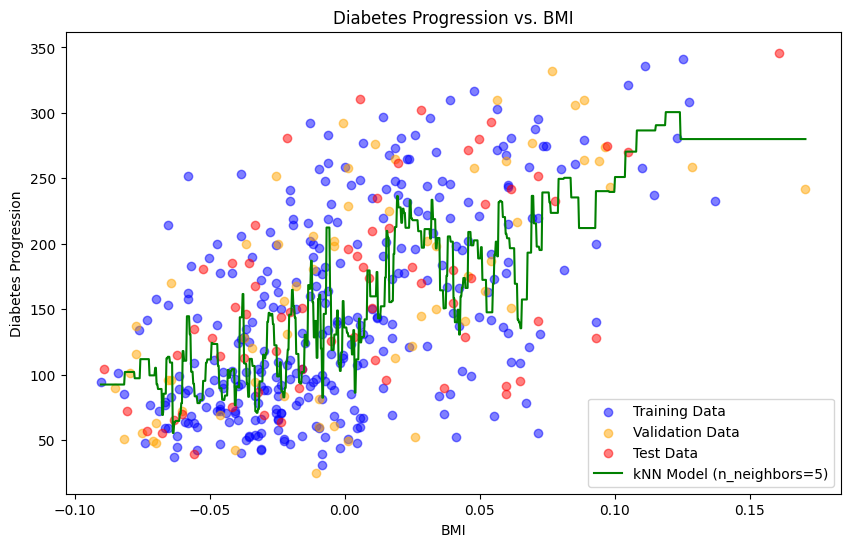

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np


diabetes = datasets.load_diabetes()

# For visualization, we'll select a single feature. Let's use BMI (Body Mass Index), which is the 2nd feature in the dataset.
X = diabetes.data[:, np.newaxis, 2]  # Reshaping for a single feature
y = diabetes.target

# Splitting the dataset into training 70%, validation 15%, and test 15%:
X_train, X_temp_test, y_train, y_temp_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp_test, y_temp_test, test_size=0.5)

# Combine training and validation sets for plotting as requested
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Training the kNN model with n_neighbors=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# # Generate a sequence of numbers from minimum to maximum BMI values for predictions
X_fit = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Predict the target variable for our fit data
y_fit = knn.predict(X_fit)


# Plotting graph:
plt.figure(figsize=(10, 6))
# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)
# Plot validation data
plt.scatter(X_val, y_val, color='orange', label='Validation Data', alpha=0.5)
# Plot test data
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.5)
# Plot the kNN model predictions
plt.plot(X_fit, y_fit, color='green', label='kNN Model (n_neighbors=5)')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Diabetes Progression vs. BMI')
plt.legend()
plt.show()

# 8. Provide a conclusion section. 

#### In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance:

In the beginning, we loaded the Dataset with the  .data attribute which is an array where each row represents a sample (patient), and each column corresponds to one of the 10 feature variables mentioned.

As the X-axis,  is an array, with 10 features, in other words, with multiple features, for visualization, we select a single feature, so we can plot a 2-D graph. In this case, we choose BMI (Body Mass Index), which is the 2nd feature in the dataset.

The green line represents the model's predictions linedoes not go through the center of the data points, indicating that the kNN model with 5 neighbours might not be perfectly fitting the data, especially considering how the points are dispersed. And it performs poorly on both the training and the test/validation data (i.e., it does not capture the underlying relationship adequately), we might say be considered a potential underfitting of the kNN model to the data.  

The model may be too simple which means it has enough capacity to learn patterns in the data adjusting its complexity, which may be necessary to better capture the underlying relationship between BMI and Diabetes Progression.